Dataset Information:

Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

```
Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

Importing necessary Modules

In [ ]:
#Importing neccessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import statsmodels.api as sm

Loading Dataset


In [ ]:
df = pd.read_csv('/content/Book1.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Preprocessing the Dataset

In [ ]:
#check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

Exploratory Data Analysis

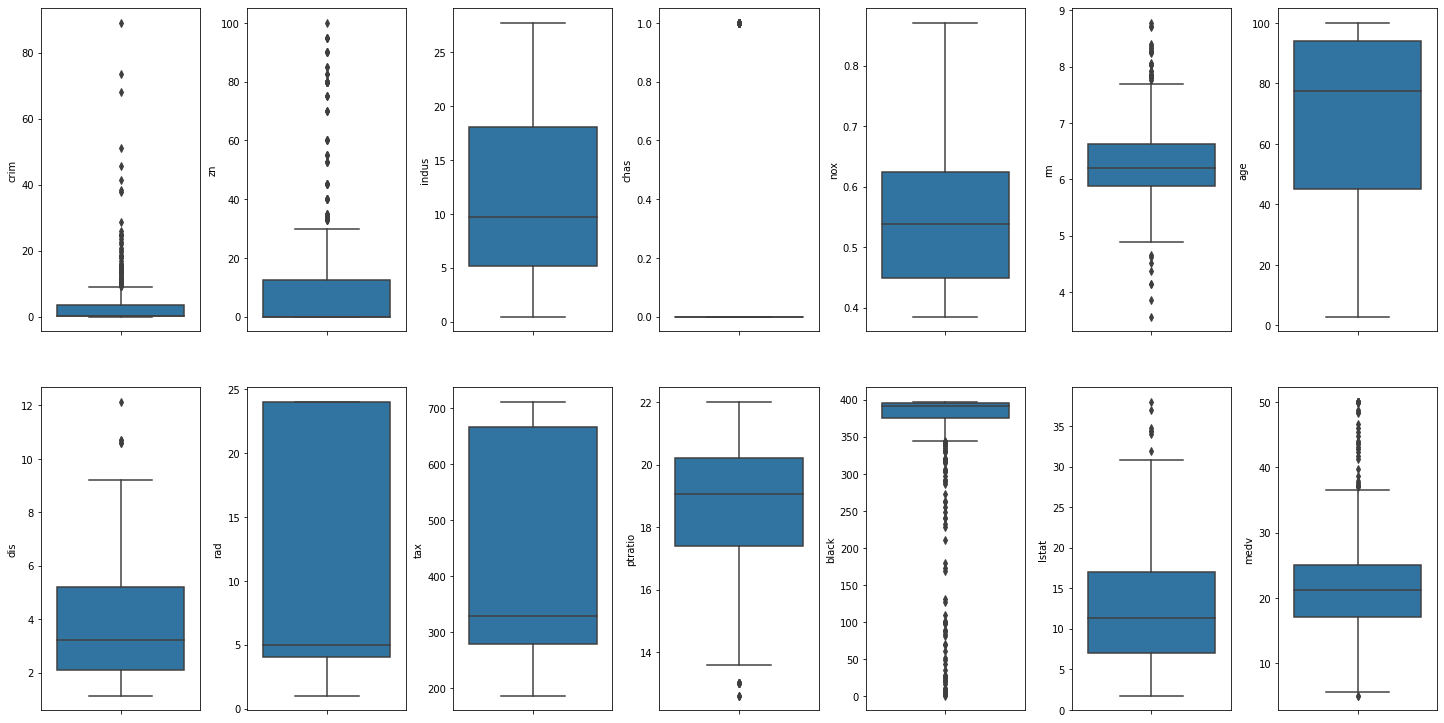

In [ ]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.boxplot(y = col,data = df, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

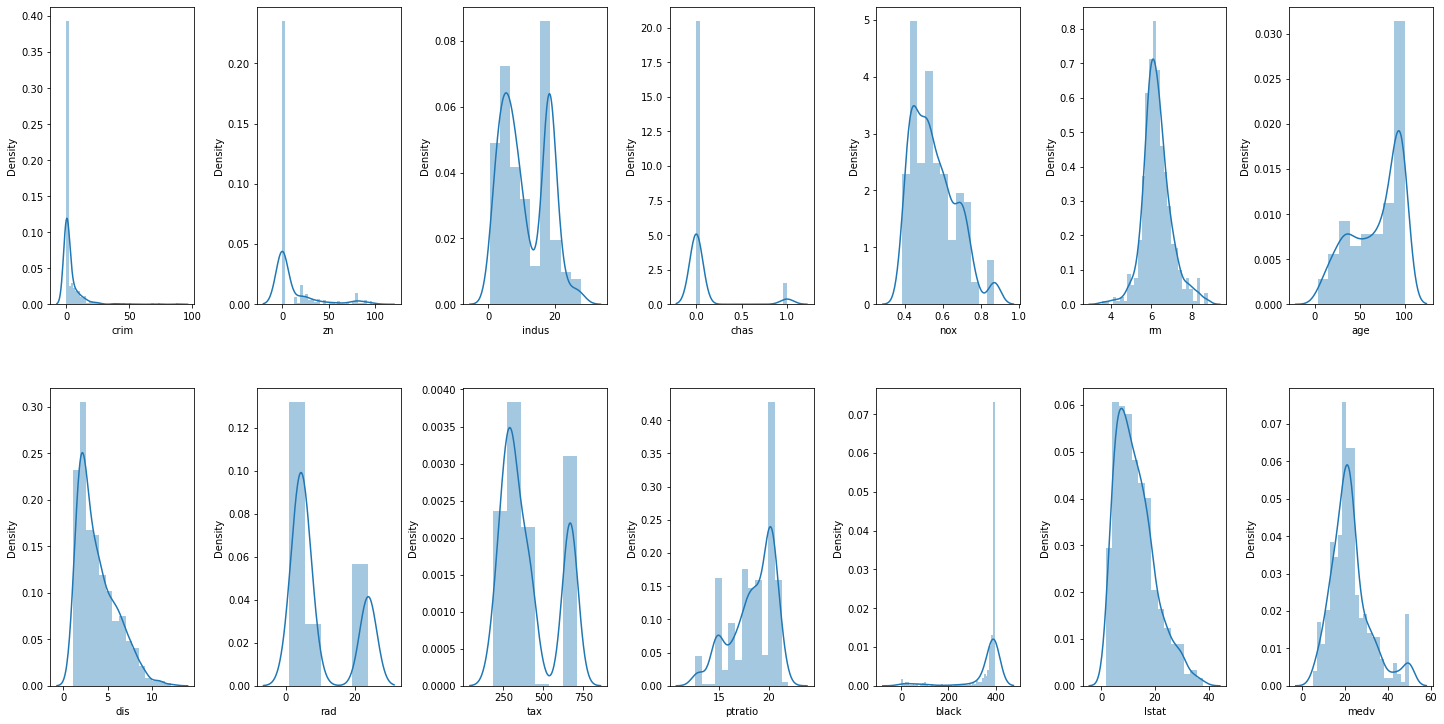

In [ ]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.distplot(value, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

Removing Outliers

In [ ]:
def outliers(df,ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR
  ls = df.index[(df[ft]<lower_bound)| (df[ft]>upper_bound)]
  return ls

In [ ]:
index_list = []
for feature in ['crim','zn','rm','lstat','medv']:
  index_list.extend(outliers(df,feature))

In [ ]:
def remove(df,ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [ ]:
df = remove(df,index_list)

In [ ]:
df.shape

(340, 14)

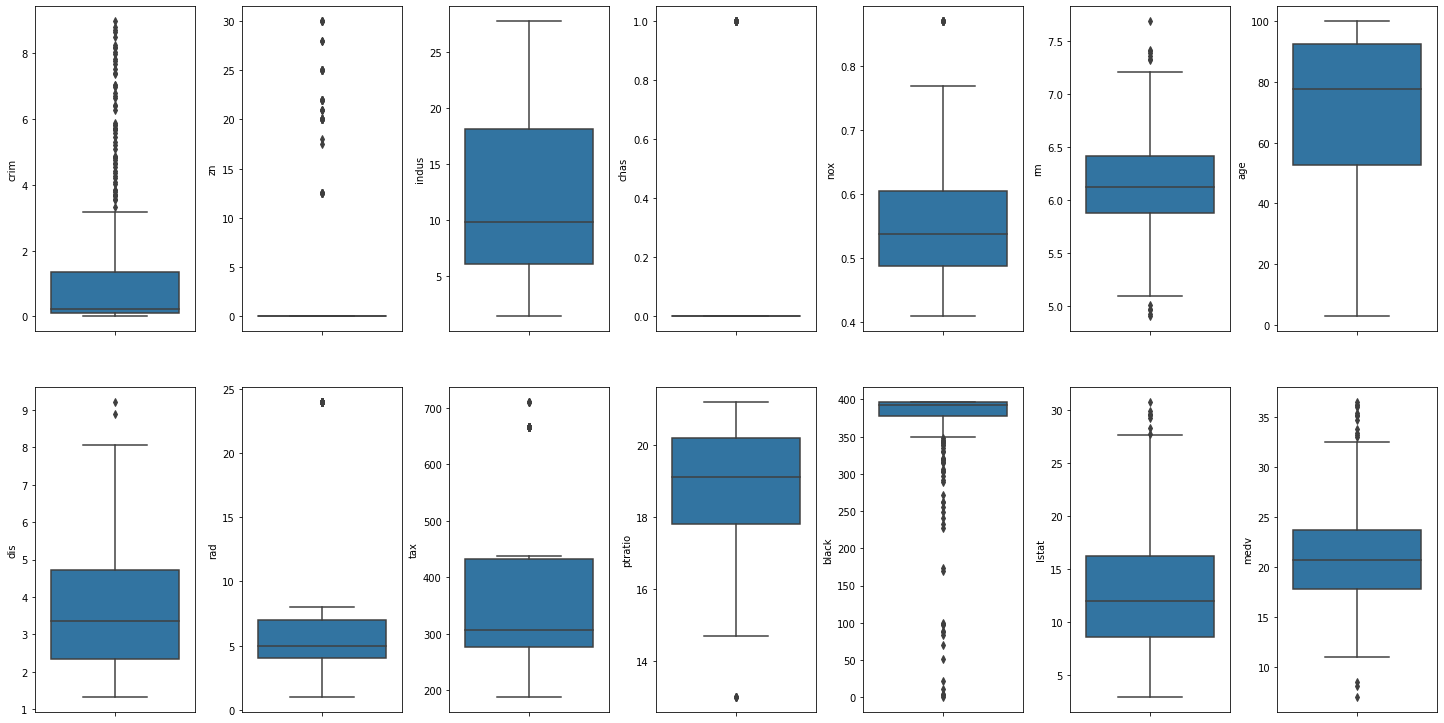

In [ ]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.boxplot(y = col,data = df, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

In [ ]:
ls = [df.columns]
ls


[Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
        'ptratio', 'black', 'lstat', 'medv'],
       dtype='object')]

Standardizing the Dataset

In [ ]:
scaler = preprocessing.StandardScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'])

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.615058,1.730684,-1.415750,-0.275589,-0.170905,0.911917,-0.195384,0.223843,-0.925860,-0.566909,-1.625695,0.416646,-1.388441,0.577262
1,-0.605773,-0.438208,-0.682071,-0.275589,-0.792628,0.575924,0.334730,0.734088,-0.793204,-0.921118,-0.397501,0.416646,-0.648171,0.114590
2,-0.605782,-0.438208,-0.682071,-0.275589,-0.792628,2.242798,-0.354031,0.734088,-0.793204,-0.921118,-0.397501,0.361291,-1.557493,2.640004
3,-0.603535,-0.438208,-1.435787,-0.275589,-0.891743,1.834806,-0.946056,1.371152,-0.660548,-1.052307,0.044648,0.385773,-1.751458,2.389390
4,-0.587310,-0.438208,-1.435787,-0.275589,-0.891743,2.159891,-0.621023,1.371152,-0.660548,-1.052307,0.044648,0.416646,-1.326158,2.929173


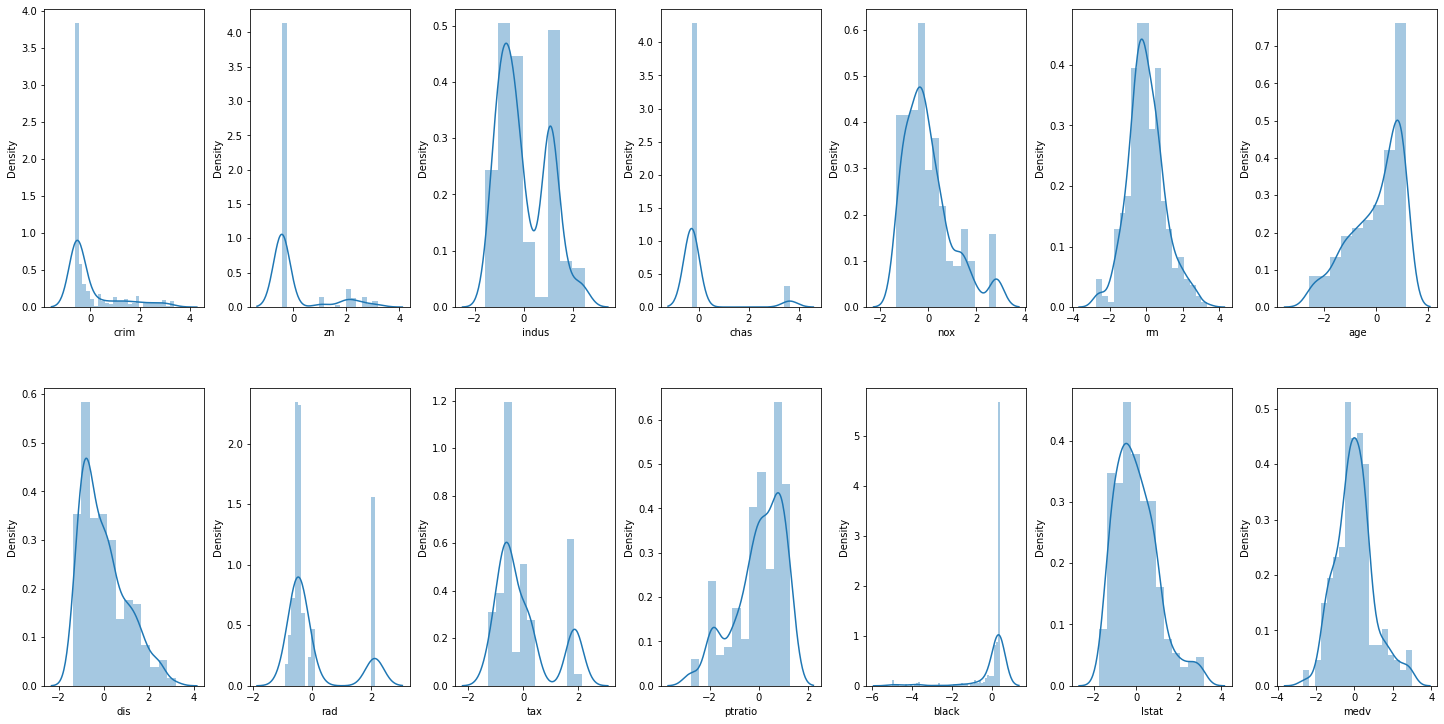

In [ ]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
index = 0
ax = ax.flatten()
for col,value in df.items():
  sns.distplot(value, ax = ax[index])
  index+=1
plt.tight_layout(pad = 0.5, w_pad=0.7, h_pad = 5.0)

Checking multicollinearity

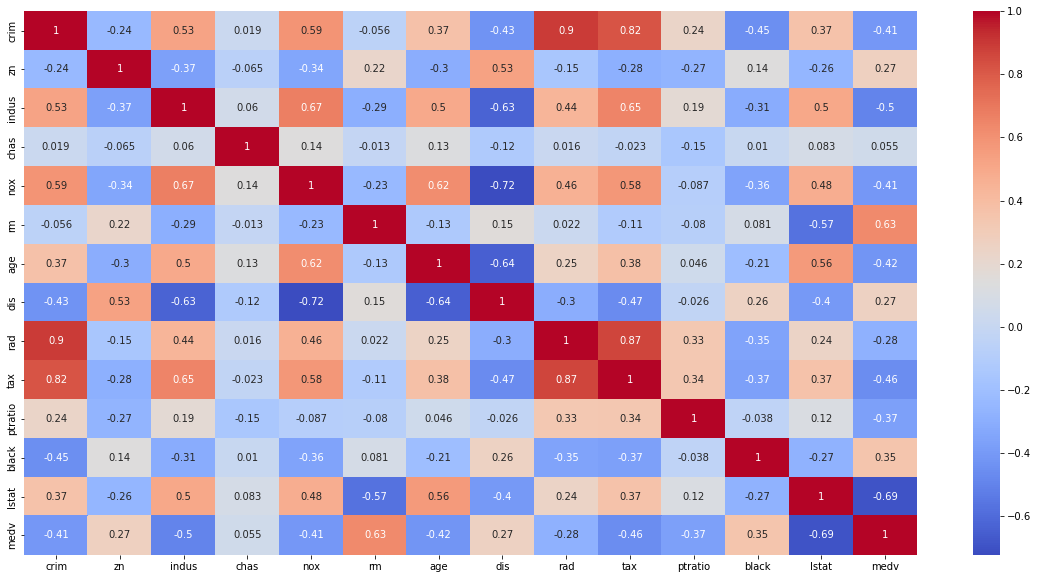

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

We see 'tax' column is highly correlated with 'rad' & 'crim'. We will drop this column from our dataset to remove probelematic multicollinearity.

In [ ]:
df.drop(columns = 'rad', inplace = True)

In [ ]:
df.shape

(340, 13)

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,black,lstat,medv
0,-0.615058,1.730684,-1.415750,-0.275589,-0.170905,0.911917,-0.195384,0.223843,-0.566909,-1.625695,0.416646,-1.388441,0.577262
1,-0.605773,-0.438208,-0.682071,-0.275589,-0.792628,0.575924,0.334730,0.734088,-0.921118,-0.397501,0.416646,-0.648171,0.114590
2,-0.605782,-0.438208,-0.682071,-0.275589,-0.792628,2.242798,-0.354031,0.734088,-0.921118,-0.397501,0.361291,-1.557493,2.640004
3,-0.603535,-0.438208,-1.435787,-0.275589,-0.891743,1.834806,-0.946056,1.371152,-1.052307,0.044648,0.385773,-1.751458,2.389390
4,-0.587310,-0.438208,-1.435787,-0.275589,-0.891743,2.159891,-0.621023,1.371152,-1.052307,0.044648,0.416646,-1.326158,2.929173


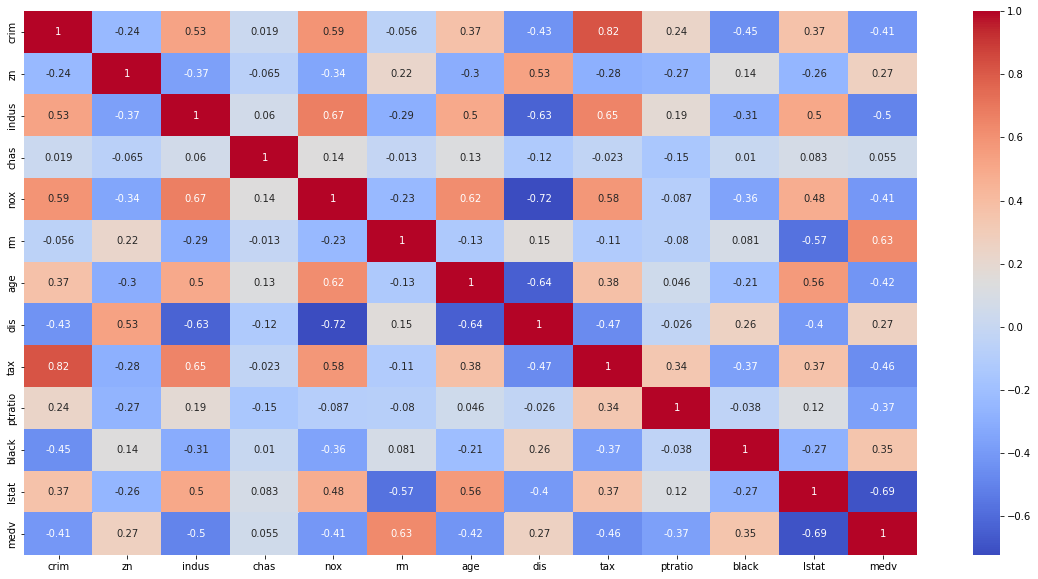

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')

We see that following columns are highly correlated with our dependent variable 'medv':
1. lstat
2. rm
3. indus
4. tax

We will plot scatterplots for the above mentioned column v/s 'medv'.

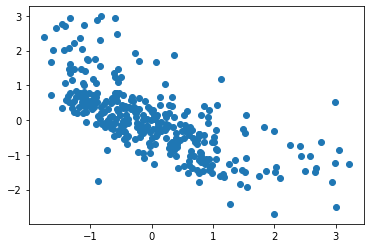

In [ ]:
#'lstat' v/s 'medv'
plt.scatter(df['lstat'],df['medv'])
plt.show()

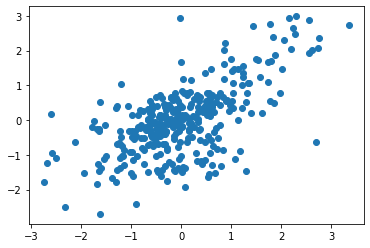

In [ ]:
#'rm' v/s 'medv'
plt.scatter(df['rm'],df['medv'])
plt.show()

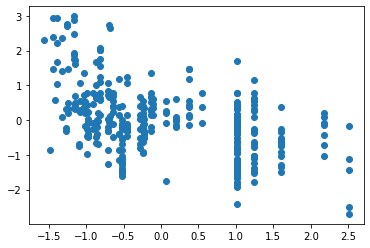

In [ ]:
#'indus' v/s 'medv'
plt.scatter(df['indus'],df['medv'])
plt.show()

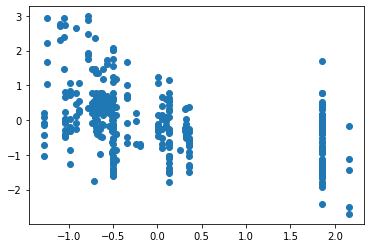

In [ ]:
#'tax' v/s 'medv'
plt.scatter(df['tax'],df['medv'])
plt.show()

OLS regression:

'lstat' v/s 'medv'

In [ ]:
def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)
  
    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)
  
    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
  
    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x
  
    return (b_0, b_1)

In [ ]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, marker = "o", s = 30)
  
    # predicted response vector
    y_pred = b[0] + b[1]*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

In [ ]:
  X = df['lstat']
  Y = df['medv']
  X = sm.add_constant(X)
  result = sm.OLS(Y,X).fit()
  print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     313.3
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.53e-50
Time:                        09:18:49   Log-Likelihood:                -370.94
No. Observations:                 340   AIC:                             745.9
Df Residuals:                     338   BIC:                             753.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.951e-16      0.039  -1.01e-14      1.0

The coefficient on 'lstat' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [ ]:
x = np.array(df['lstat'])
y = np.array(df['medv'])

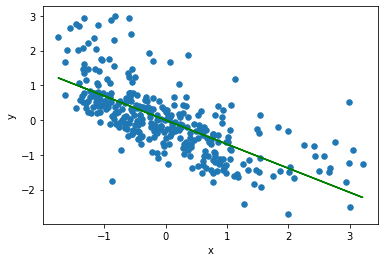

In [ ]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'rm' v/s 'medv'

In [ ]:
  X = df['rm']
  Y = df['medv']
  X = sm.add_constant(X)
  result = sm.OLS(Y,X).fit()
  print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     227.4
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.18e-39
Time:                        09:18:49   Log-Likelihood:                -394.98
No. Observations:                 340   AIC:                             794.0
Df Residuals:                     338   BIC:                             801.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.951e-16      0.042  -9.39e-15      1.0

The coefficient on 'rm' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [ ]:
x = np.array(df['rm'])
y = np.array(df['medv'])

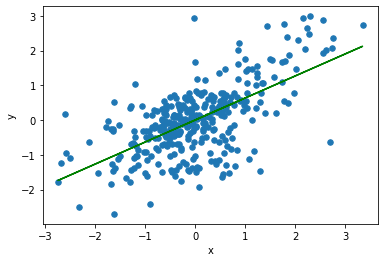

In [ ]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'indus' v/s 'medv'

In [ ]:
  X = df['indus']
  Y = df['medv']
  X = sm.add_constant(X)
  result = sm.OLS(Y,X).fit()
  print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     111.2
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.15e-22
Time:                        09:18:50   Log-Likelihood:                -434.09
No. Observations:                 340   AIC:                             872.2
Df Residuals:                     338   BIC:                             879.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.951e-16      0.047  -8.37e-15      1.0

The coefficient on 'indus' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [ ]:
x = np.array(df['indus'])
y = np.array(df['medv'])

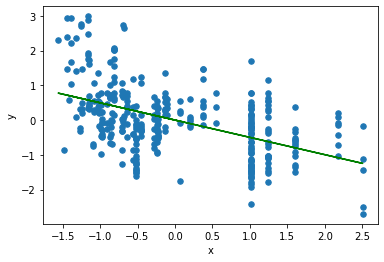

In [ ]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'tax' v/s 'medv'

In [ ]:
X = df['tax']
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     88.93
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           6.76e-19
Time:                        09:18:50   Log-Likelihood:                -442.73
No. Observations:                 340   AIC:                             889.5
Df Residuals:                     338   BIC:                             897.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.951e-16      0.048  -8.16e-15      1.0

The coefficient on 'tax' is statistically significant.

The coefficient on 'constant' is statistically insignificant.

In [ ]:
x = np.array(df['tax'])
y = np.array(df['medv'])

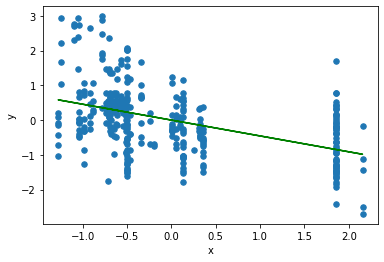

In [ ]:
b = estimate_coef(x,y)
plot_regression_line(x,y,b)

'lstat' , 'rm' v/s 'medv'

In [ ]:
X = df[['lstat','rm']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     218.1
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           1.70e-61
Time:                        09:18:50   Log-Likelihood:                -341.27
No. Observations:                 340   AIC:                             688.5
Df Residuals:                     337   BIC:                             700.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.951e-16      0.036   -1.1e-14      1.0

'lstat' , 'rm' , 'indus' v/s ''medv'

In [ ]:
X = df[['lstat','rm','indus']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     162.9
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           3.39e-65
Time:                        09:18:50   Log-Likelihood:                -329.77
No. Observations:                 340   AIC:                             667.5
Df Residuals:                     336   BIC:                             682.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.504e-16      0.035  -1.01e-14      1.0

In [ ]:
X = df[['lstat','rm','indus','tax']]
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     142.8
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.31e-71
Time:                        09:18:50   Log-Likelihood:                -313.26
No. Observations:                 340   AIC:                             636.5
Df Residuals:                     335   BIC:                             655.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.504e-16      0.033  -1.05e-14      1.0

In [ ]:
X = df.drop(columns = 'medv')
Y = df['medv']
X = sm.add_constant(X)
result = sm.OLS(Y,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     74.79
Date:                Sun, 17 Jul 2022   Prob (F-statistic):           4.02e-86
Time:                        09:18:50   Log-Likelihood:                -257.98
No. Observations:                 340   AIC:                             542.0
Df Residuals:                     327   BIC:                             591.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.504e-16      0.029  -1.23e-14      1.0